In [2]:
import json 
from PIL import Image, ImageDraw
import os

In [3]:
root_anno = "/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/BDD/bdd100k_labels_release/bdd100k/labels"
root_image = "/home/duypd/ThisPC-DuyPC/SG-Retrieval/Datasets/BDD/bdd100k/bdd100k/images/100k"
anno_file = os.path.join(root_anno, "bdd100k_labels_images_val.json")
with open(anno_file, 'r') as f:
    anno = json.load(f)

len(anno)

10000

In [4]:
check = anno[-1]
dump_check = os.path.join(root_anno, f"{check['name']}.json")
with open(dump_check, 'w') as f:
    json.dump(check, f)

print(check.keys())
print(len(check['labels']))
print(check['labels'][0].keys())

dict_keys(['name', 'attributes', 'timestamp', 'labels'])
12
dict_keys(['category', 'attributes', 'manualShape', 'manualAttributes', 'box2d', 'id'])


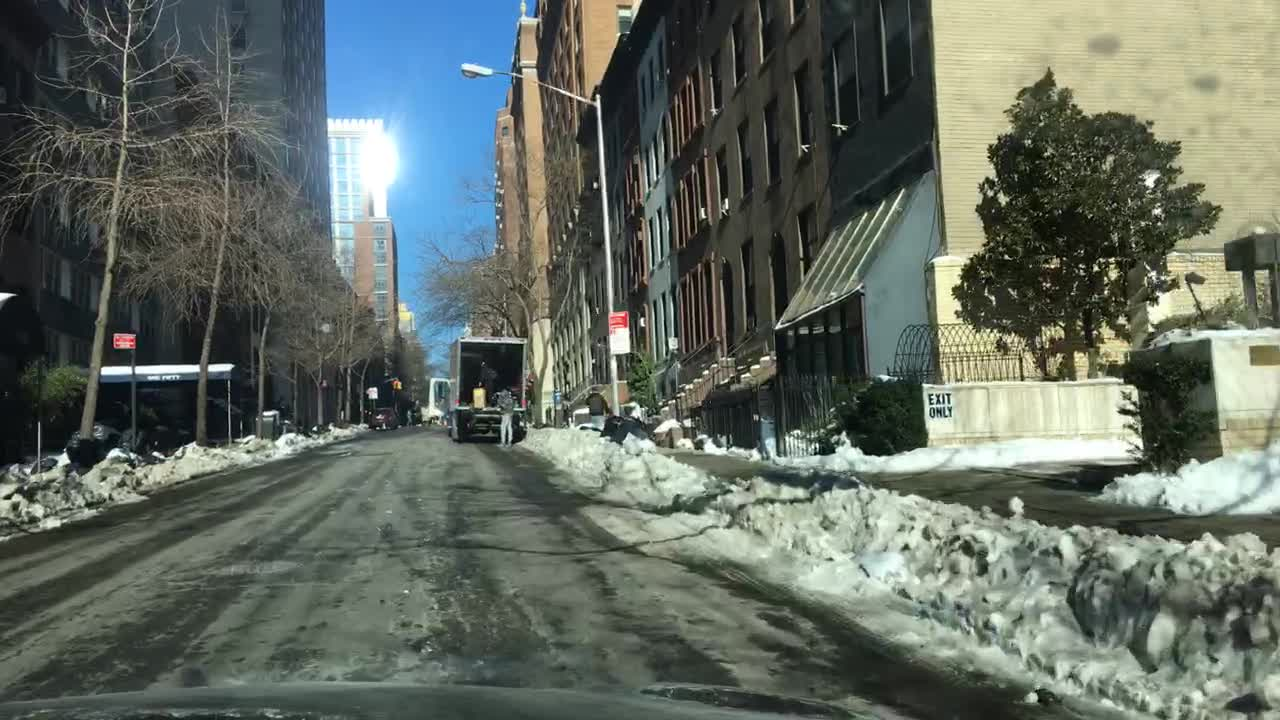

In [5]:
img = Image.open(os.path.join(root_image, 'val', check['name'])).convert('RGB')
img

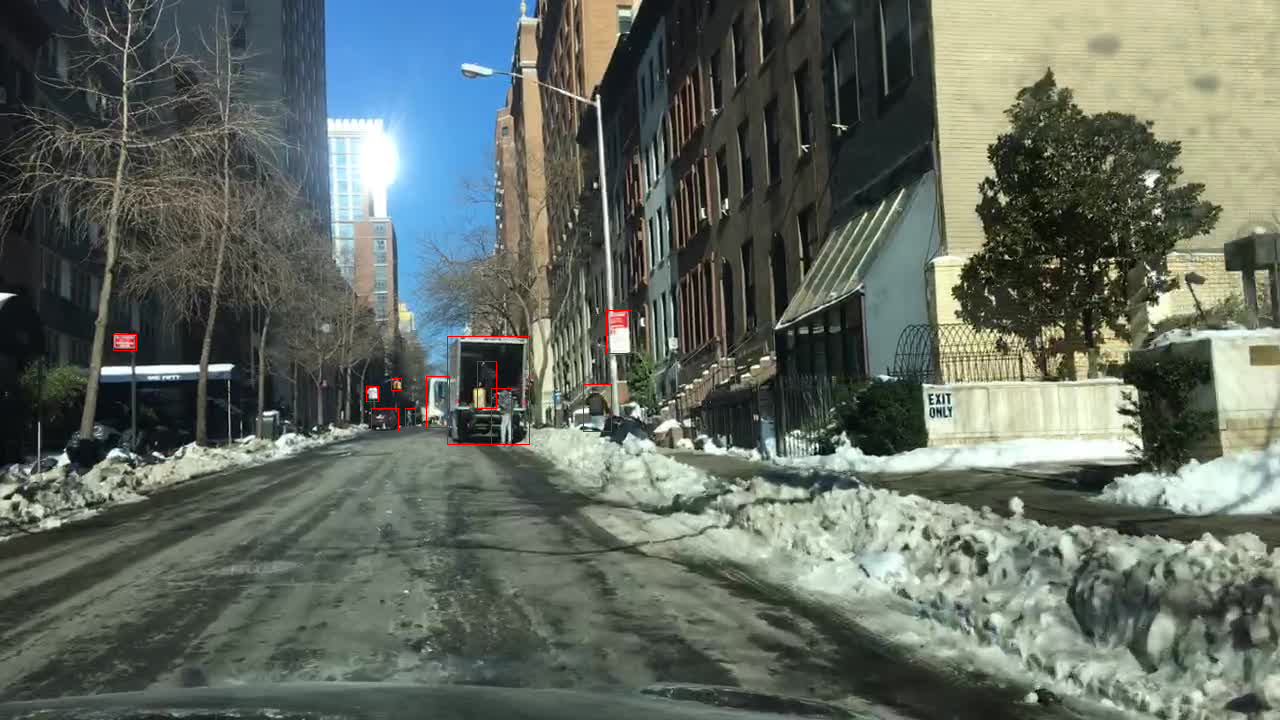

In [6]:
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for item in check['labels']:
    if("box2d" in item.keys()):
        x1, y1, x2, y2 =  item['box2d']['x1'], item['box2d']['y1'], item['box2d']['x2'], item['box2d']['y2']
        draw.rectangle(((x1, y1), (x2, y2)), fill=None, outline='red')

img_draw

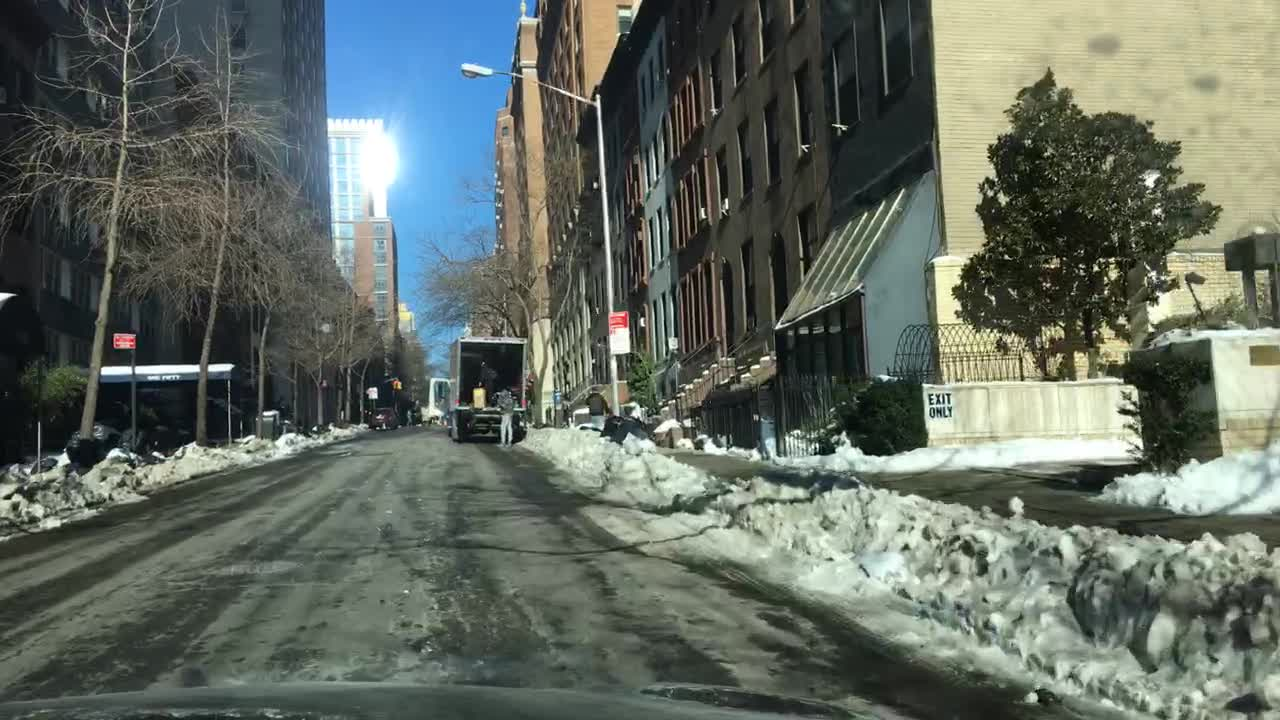

In [7]:
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for item in check['labels']:
    if("poly2d" in item.keys()):
        for poly in item['poly2d']:
            if poly['closed'] == True:
                continue
            vertices = [tuple(map(float, v)) for v in poly["vertices"]]
            draw.line(vertices, fill=(255,255,0), width=2)
            # draw.polygon(vertices, outline=(0, 0, 0), fill=(255, 200, 0))
img_draw

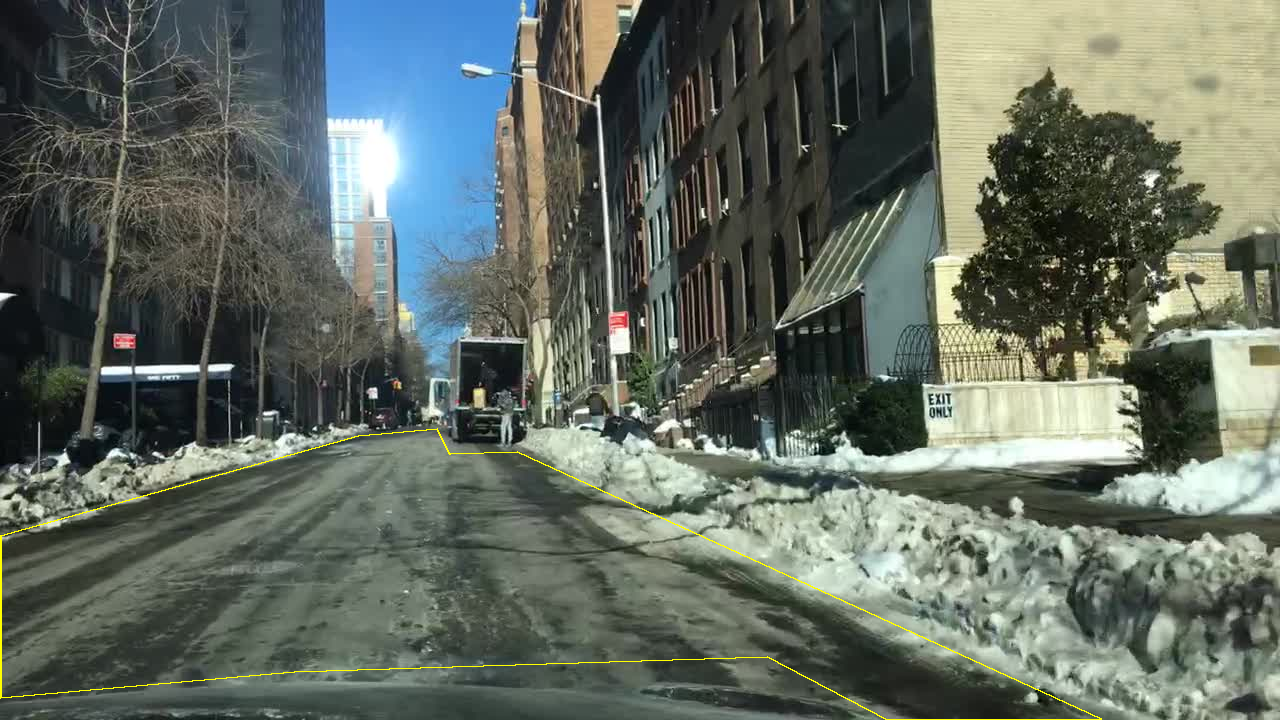

In [8]:
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for item in check['labels']:
    if("poly2d" in item.keys()):
        for poly in item['poly2d']:
            if poly['closed'] == False:
                continue
            vertices = [tuple(map(float, v)) for v in poly["vertices"]]
            draw.line(vertices, fill=(255,255,0), width=2)
            # draw.polygon(vertices, outline=(0, 0, 0), fill=(255, 200, 0))
img_draw